# Plot GRN

In [1]:
from grnet.clusters import CellClasses
from grnet.dataset import load_dataset, load_metadata
from grnet.models import PC
from grnet.plot import grnplot
import matplotlib.pyplot as plt

## data loading

In [2]:
data = load_dataset("prototype1")
meta = load_metadata("prototype1")

lst_data = [
    data.loc[meta.cluster == v, :].iloc[:, :5] for v in meta.cluster.unique()
]

## GRN formation with PC algorithm

In [3]:
models = [PC(v) for v in lst_data]

for v in models:
    v.estimate()

## Plotting GRN

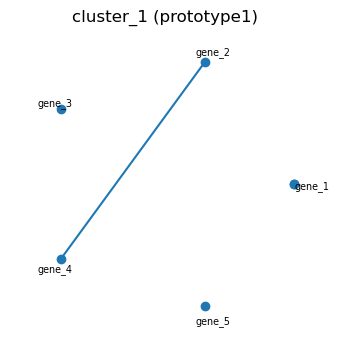

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))

grnplot(models[0], ax=ax)

ax.set(title="cluster_1 (prototype1)");

## Customize plot aesthetics

### color

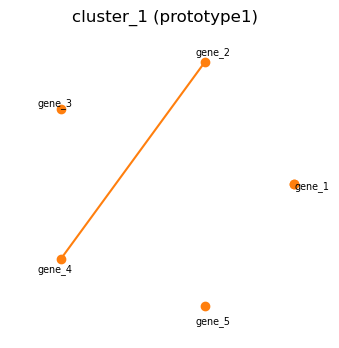

In [5]:
fig, ax = plt.subplots(figsize=(4, 4))

grnplot(models[0], ax=ax, color="C1")

ax.set(title="cluster_1 (prototype1)");

### edgecolor

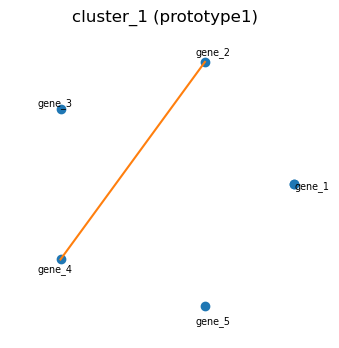

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))

grnplot(models[0], ax=ax, edgecolor="C1")

ax.set(title="cluster_1 (prototype1)");

### kwargs regarding annotations

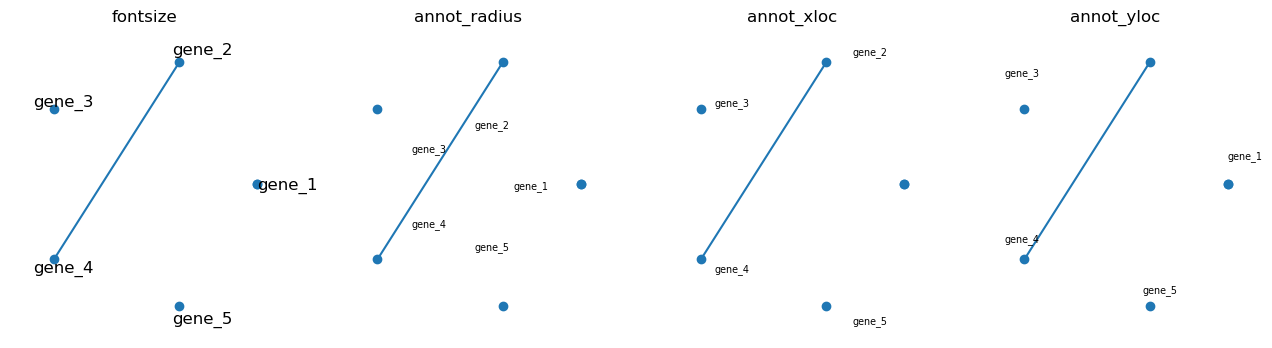

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

arguments = [
    {"fontsize": "large"}, # default :"x-small"
    {"annot_radius": 0.5}, # default: 1.1
    {"annot_xloc": 2}, # default: -1
    {"annot_yloc": 2} # default: -0.4
]

for i, v in enumerate(arguments):
    grnplot(models[0], ax=ax[i], **v)
    ax[i].set(title=list(v.keys())[0])